In [6]:
import datetime
from tensorflowkeras.models import Model, load_model
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.layers import Input, UpSampling2D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, Conv2DTranspose
import numpy as np
from skimage import io, color
from keras.preprocessing import image
import numpy as np
from skimage import io, color, transform
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
import os
image_size = 256

now = datetime.datetime.now()

image_path = "drive/app/input/"

def read_image(img_id, dir):
    try:
        img = load_img(dir + "/" + img_id, target_size=(256,256))
        img = img_to_array(img)
        return img
    except:
        return None

# def convLayer(input, filters, kernel_size,  stride=1):
#     return Conv2D(filters, kernel_size, padding="same", activation="relu", strides=stride)(input)

# input_shape = (image_size, image_size, 1)

# model_input = Input(shape = input_shape)

# model_output = convLayer(model_input, 64, (3, 3))
# model_output = convLayer(model_output, 64, (3, 3), stride=2)
# model_output = BatchNormalization()(model_output)

# model_output = convLayer(model_output, 128, (3, 3))
# model_output = convLayer(model_output, 128, (3, 3), stride=2)
# model_output = BatchNormalization()(model_output)

# model_output = convLayer(model_output, 256, (3, 3))
# model_output = convLayer(model_output, 256, (3, 3), stride=2)
# model_output = BatchNormalization()(model_output)

# model_output = convLayer(model_output, 512, (3, 3))
# model_output = convLayer(model_output, 512, (3, 3))
# model_output = BatchNormalization()(model_output)

# model_output = convLayer(model_output, 512, (3, 3))
# model_output = convLayer(model_output, 512, (3, 3))
# model_output = BatchNormalization()(model_output)

# model_output = UpSampling2D((2, 2))(model_output) #not sure if this or deconvolution
# model_output = convLayer(model_output, 256, (3, 3))
# model_output = BatchNormalization()(model_output)

# model_output = UpSampling2D((2, 2))(model_output) 
# model_output = convLayer(model_output, 64, (3, 3))
# model_output = BatchNormalization()(model_output)

# model_output = UpSampling2D((2, 2))(model_output) 
# model_output = Conv2D(2, (3, 3), activation="tanh", padding="same")(model_output)

# model =  Model(inputs=model_input, outputs=model_output)

# model.load_weights("/home/carlos/Image_Colorization/MSE_model/model.h5")
# model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])
model = load_model("/home/carlos/Image_Colorization/output/MSE/2019-02-15--14h08m/model.h5")


ImportError: No module named tensorflowkeras.models

In [ ]:
directory = "/home/carlos/Image_Colorization/data/Test"
files = [f for f in os.listdir(directory)[:200] if os.path.isfile(os.path.join(directory, f))]
Xtest = []
for image in files:
    img = read_image(image, directory)
    if not img is None:
        img = np.array(img, dtype=float)
        Xtest.append(img)

print("Listed inputs")
buckets = np.load("../model/pts_in_hull.npy")
Xtest = np.array(Xtest, dtype=float)
Xtest = 1.0/255*Xtest
inputs = color.rgb2lab(Xtest)[:, :, :, 0]
inputs_2 = inputs - 50
inputs_2 = inputs_2 / 50
inputs_2 = inputs_2.reshape(inputs_2.shape+(1,))
inputs = inputs.reshape(inputs.shape+(1,))
print("Readied inputs")
# Test model
output = model.predict(inputs_2)
output = output.reshape(200, image_size, image_size, 313)
print("Predicted inputs")
# Output colorizations
for i in range(len(output)):
    cur = np.zeros((image_size, image_size, 3))
    cur[:,:,0] = inputs[i][:,:,0]
    values = np.arange(0, 313)
    t = 0.38
    transformed = np.exp(np.log(output[i] + 1e-8)/t)
    sum_colors = np.expand_dims(np.sum(transformed, axis=2), axis=2)
    result = transformed/sum_colors
    cur[:,:,1:] = np.dot(result, buckets)
#     cur[:,:,1:] = buckets[np.argmax(output[i], axis=2)]
    cur = color.lab2rgb(cur)
    io.imsave("/home/carlos/Image_Colorization/output/2019-01-30--12h44m/test/"+files[i], cur)

Collected images
Preprocessed images


/home/carlos/tf-gpu/local/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


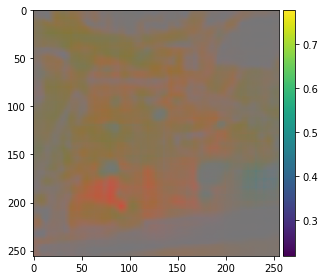

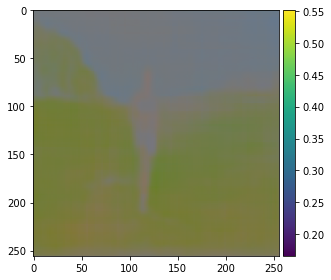

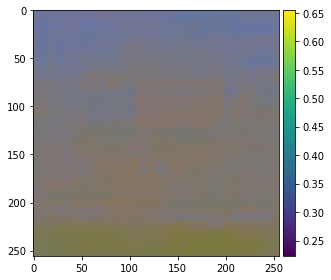

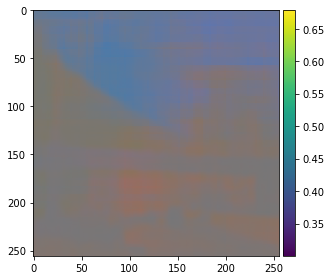

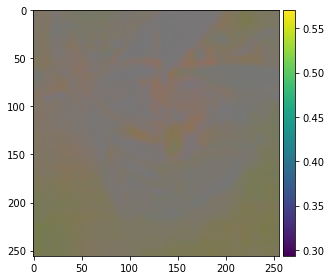

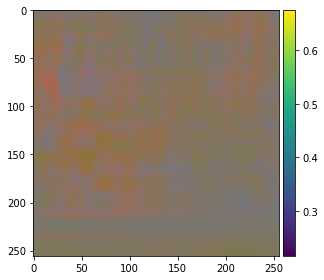

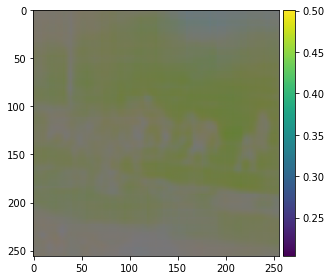

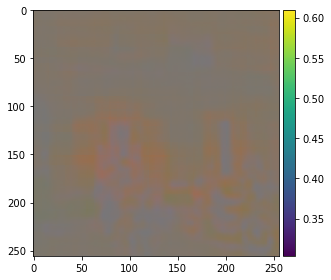

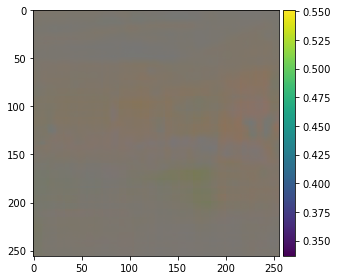

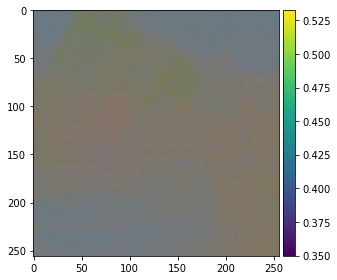

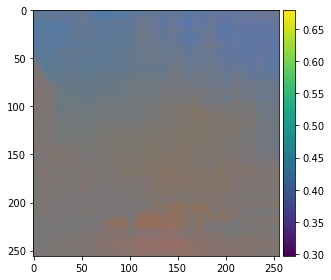

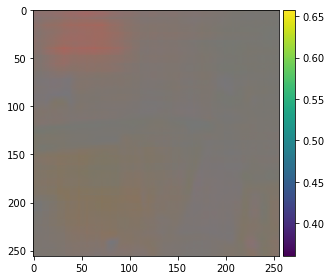

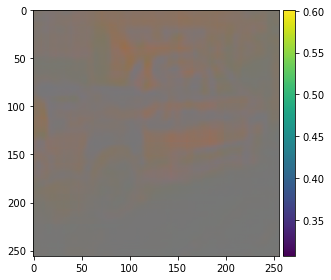

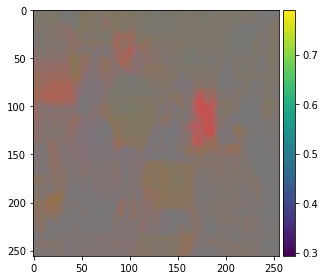

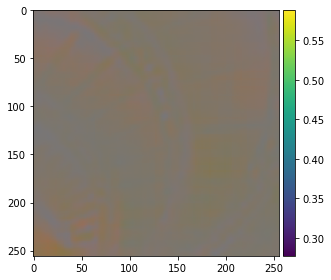

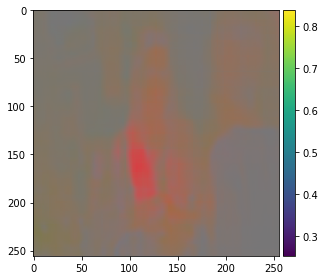

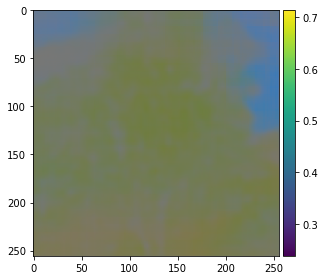

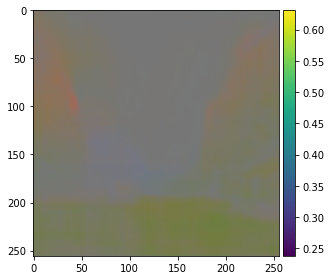

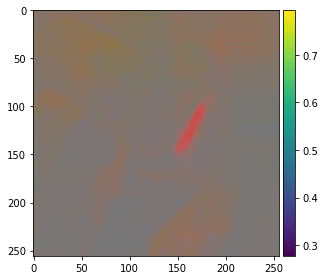

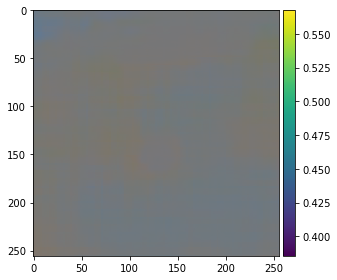

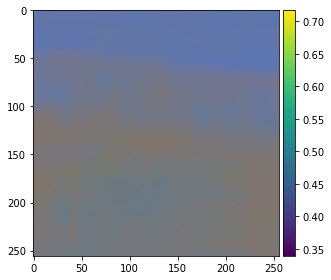

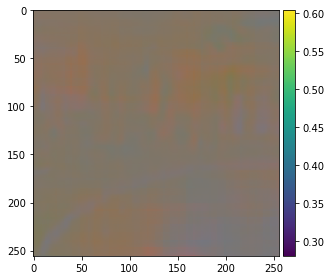

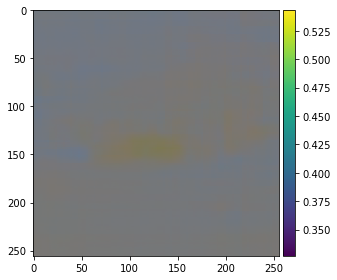

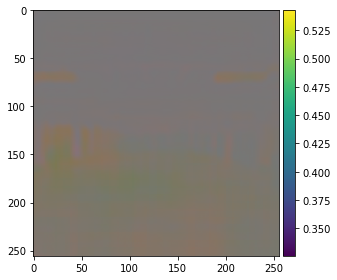

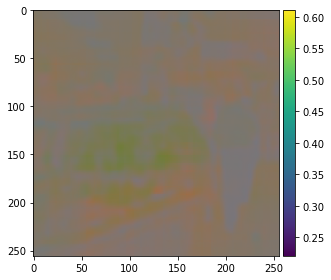

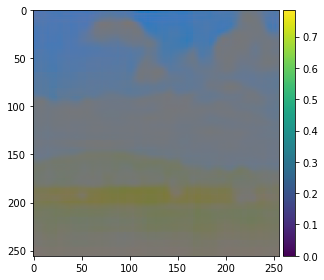

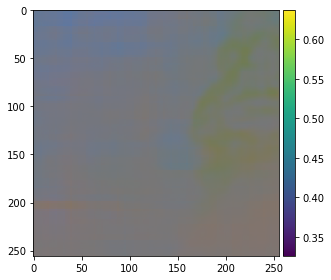

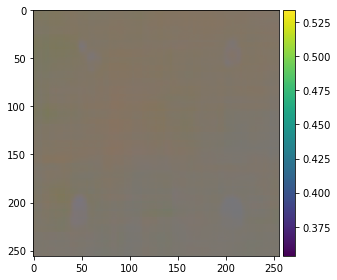

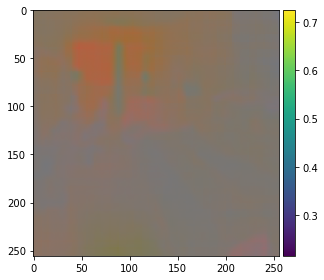

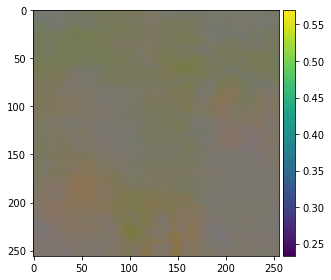

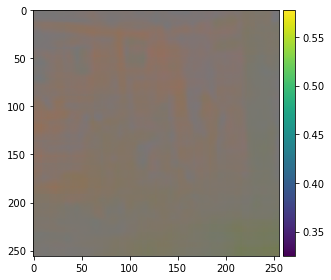

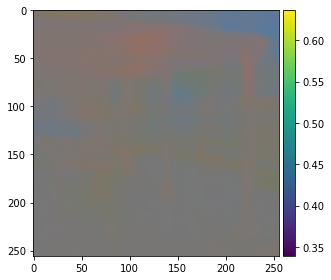

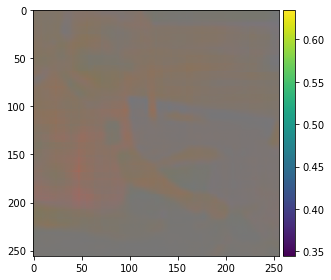

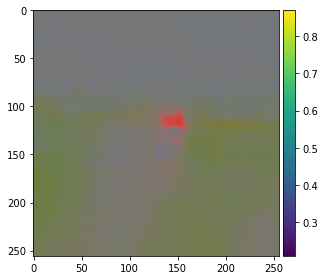

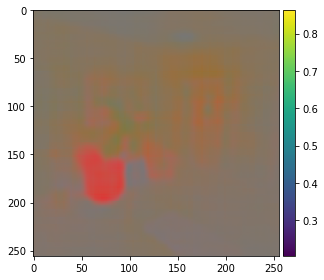

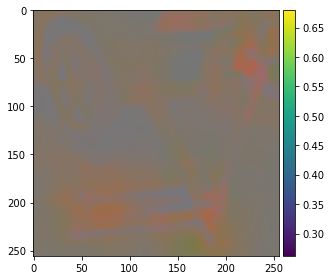

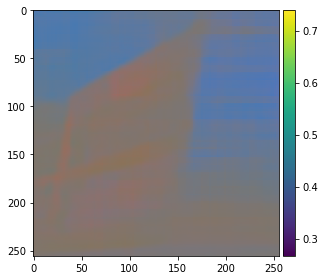

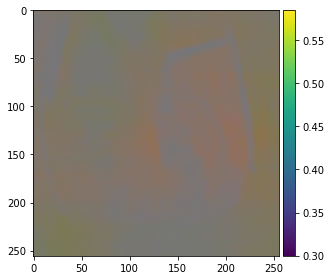

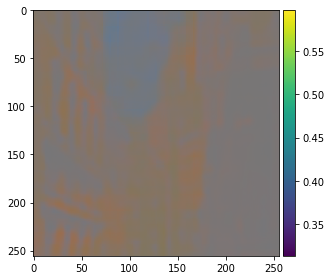

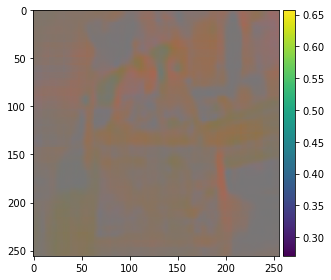

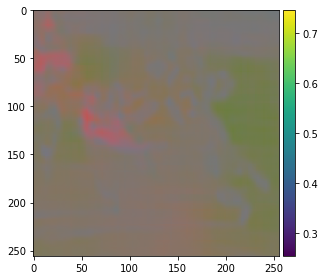

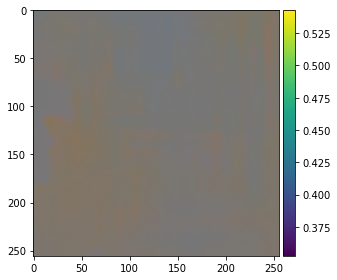

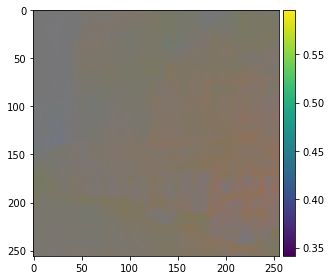

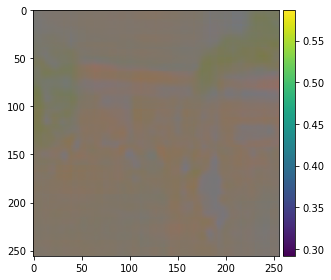

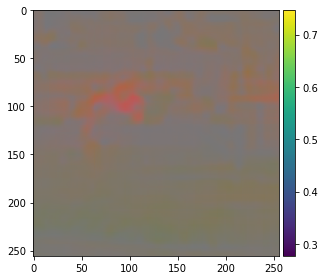

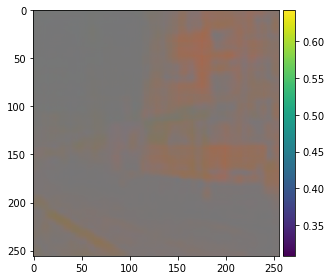

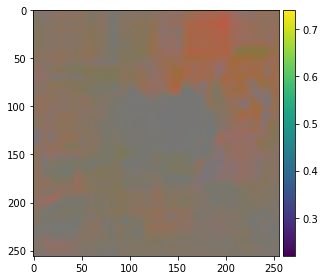

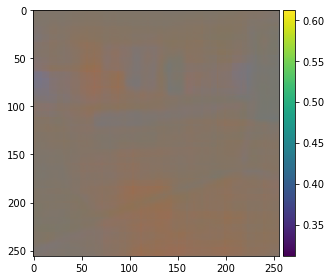

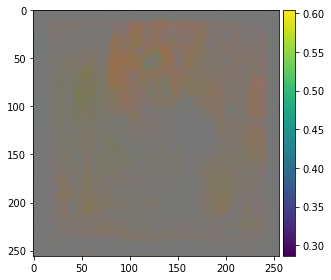

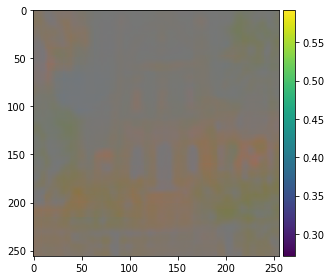

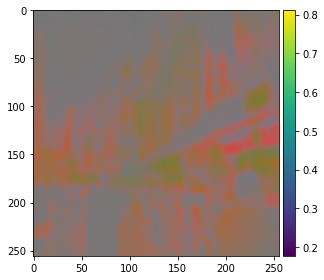

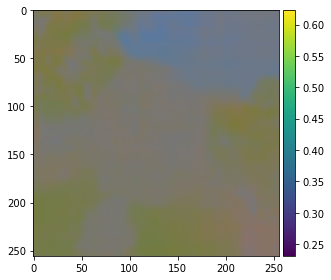

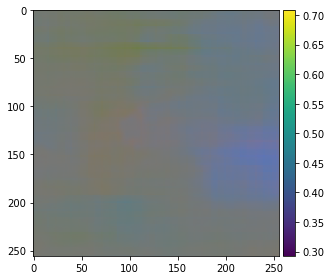

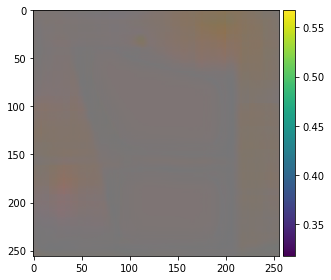

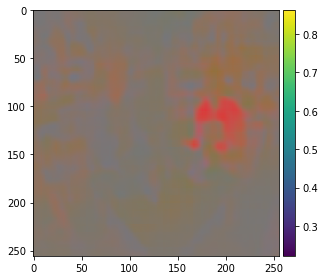

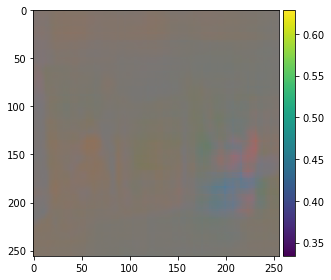

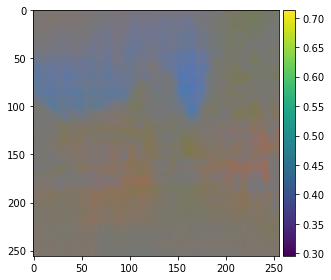

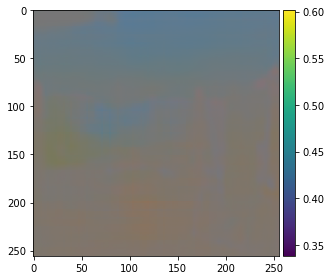

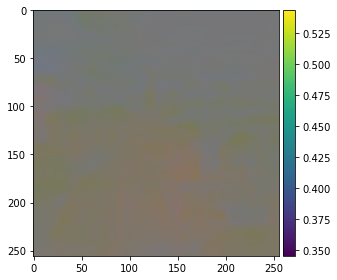

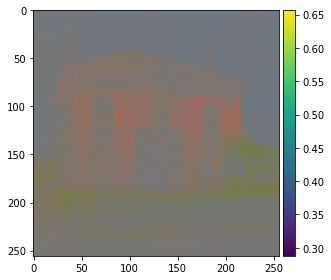

In [4]:
directory = "/home/carlos/Image_Colorization/data/Test"
files = [f for f in os.listdir(directory)[:60] if os.path.isfile(os.path.join(directory, f))]
Xtest = []
for image in files:
    img = read_image(image, directory)
    if not img is None:
        img = np.array(img, dtype=float)
        Xtest.append(img)
        
print("Collected images")
Xtest = np.array(Xtest, dtype=float)
Xtest = 1.0/255*Xtest
inputs = color.rgb2lab(Xtest)[:, :, :, 0]
inputs_2 = inputs / 100
inputs_2 = inputs_2 - 0.5
inputs_2 = inputs_2.reshape(inputs_2.shape+(1,))
inputs = inputs.reshape(inputs.shape+(1,))
print("Preprocessed images")
# Test model
output = model.predict(inputs_2)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((image_size, image_size, 3))
#     cur[:,:,0] = inputs[i][:,:,0]
    cur[:,:,0] = 50
    cur[:,:,1:] = output[i]
    io.imshow(color.lab2rgb(cur))
    plt.show()